# Fourier Transform survival kit

In [1]:
import numpy as np 
import matplotlib.pylab as plt 
import scipy
import IPython.display as ipd

### Toy example

In [2]:
# import specific functions for FFT
from scipy.fft import rfft, rfftfreq

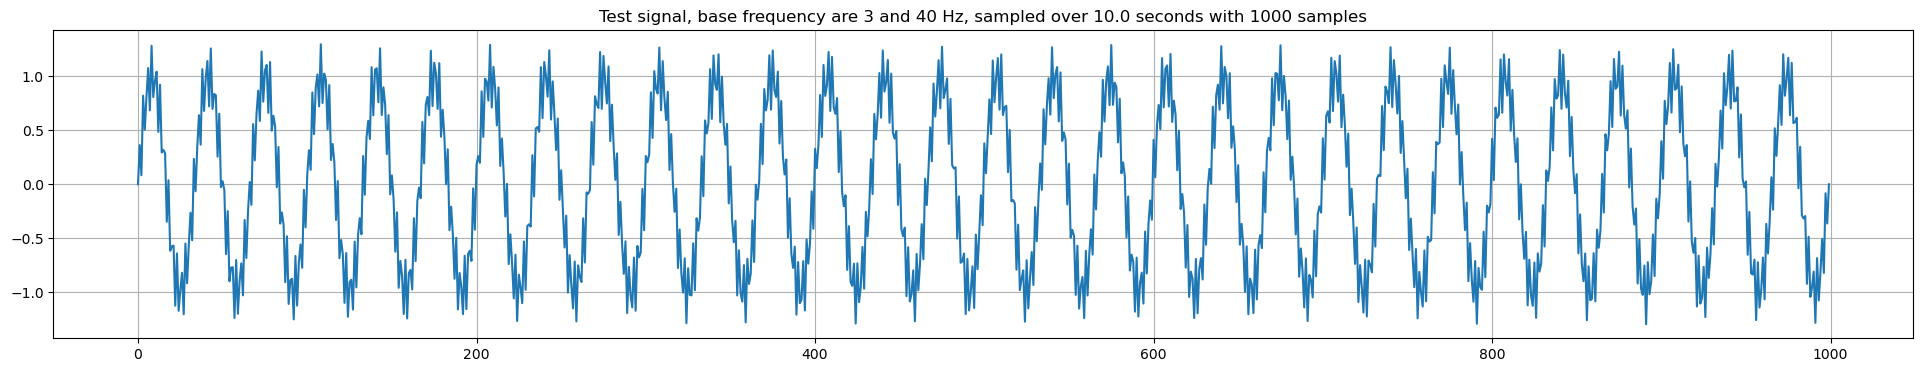

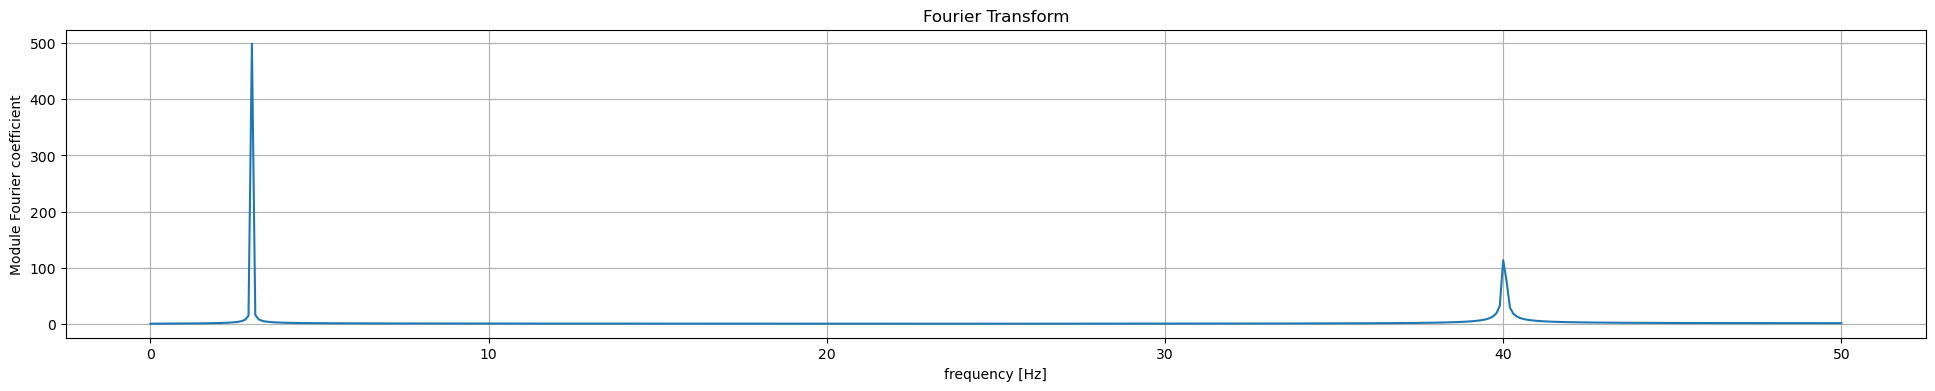

argmax frequency : 3.0 Hz
There are 1000 samples at f_sampling = 100 Hz
The frequencies are computed between -50.0 and 50.0 Hz
Only the physical frequencies are observed up to 50.0 Hz
The frequency resolution is fe/N = 0.1 Hz


In [3]:
# paramètres of the test sinusoïde
N = 1000  # number of samples
fe = 100 # fréquence échantillonage
duration = N/fe  # durée du signal

# generate sinusoïdes
f1 = 3  # sine wave frequency in hz
f2 = 40  # sine wave n°2 < fe/2
x = 1*np.sin(2*np.pi*f1*np.linspace(start=0, stop=duration, num=N)) + 0.3*np.sin(2*np.pi*f2*np.linspace(start=0, stop=duration, num=N))

# display synthetic signal
fig, ax = plt.subplots(figsize=(24,4))
ax.plot(x)
ax.grid(True)
ax.set_title(f'Test signal, base frequency are {f1} and {f2} Hz, sampled over {duration} seconds with {N} samples')

# transformée de Fourier
# NB : rfft et rfftfreq travaillent sur 0:N//2, ie fréquences positives
yf = rfft(x)   # calcule les coefficients complexes 
xf = rfftfreq(N) # calcule les fréquences correspondantes

# xf[k] is the DFT for the physical frequency k*fe/N (with -N/2 <= k <= N/2)
# one can only observe up to fe/2 (Nyquist theorem)
# ===> we observe between -fe/2 and fe/2 with resolution fe/N

fig, ax = plt.subplots(figsize=(24,4))
ax.plot(xf * fe, np.abs(yf))  # Noter le *fe pour retrouver le domaine de fréquence originel, et le module complexe de yf
ax.set_title(f'Fourier Transform')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('Module Fourier coefficient')
ax.grid(True)
plt.show()

# vérification :-)
print(f'argmax frequency : {xf[np.argmax(np.abs(yf))] * fe} Hz')

# shapes
print(f'There are {N} samples at f_sampling = {fe} Hz')
print(f'The frequencies are computed between {-fe/2} and {fe/2} Hz')
print(f'Only the physical frequencies are observed up to {fe/2} Hz')
print(f'The frequency resolution is fe/N = {fe/N} Hz')

In [ ]:
import os

# form path to wav file
filename = './data/devils_trick.wav'
# filename = 'coloniedefourmies.wav'
filepath = os.getcwd() + '/' + filename

# read the wav file
with open(filepath,'rb') as f:
    rate, wavdata = scipy.io.wavfile.read(f)
    
# listen to that outstanding bass voice
ipd.Audio(wavdata, rate=rate)

# 'the biggest trick the devil ever pulled, was convincing people he didn't exist" (Usual suspects)

### Spectral Density

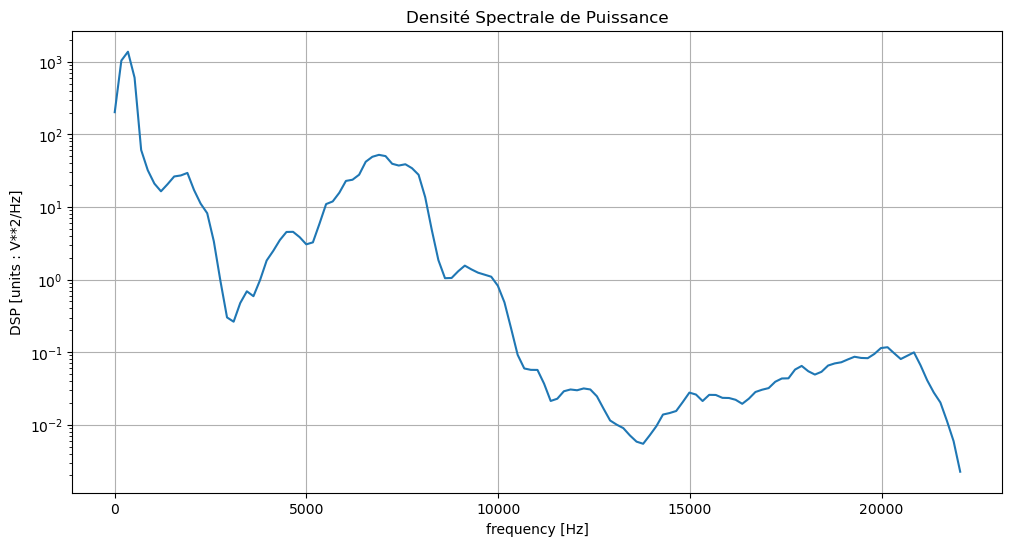

In [6]:
# Densité Spectrale de Puissance
# We have seen that computing the Fourier Transform can be misleading when computed over the entire signal

# welch is a function to calculate DSP
# welch returns 
# f : array of sample frequencies
# dsp : dsp spectrum of signal
from scipy.signal import welch

fe = 44100 # sampling frequency

# calculate DSP
f, dsp = welch(wavdata, fe)

# plot DSP
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(f, dsp)
ax.set_yscale('log')
ax.grid(True)
ax.set_title(f'Densité Spectrale de Puissance')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('DSP [units : V**2/Hz]')

plt.show()